<a href="https://colab.research.google.com/github/Gilbert9172/CSAI_assignment/blob/main/n212_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *DATA SCIENCE / SECTION 2 / SPRINT 1 / NOTE 2*

# 📝 Assignment
---

# Data Frame

In [ ]:
# 데이터는 캐글에서 받으셔도 되고 이 링크에서 불러와도 됩니다.
import pandas as pd
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/kc_house_data/kc_house_data.csv')
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

# Q1

In [ ]:
df['date'] = [int(x[:8]) for x in df.date]
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
train = df.loc[df['date'] < 20150101]
test = df.loc[df['date'] >= 20150101]

print(f'Train data: {len(train)}개', f'Test data: {len(test)}개', sep="\n" )

Train data: 14633개
Test data: 6980개


# Q2

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

features = ['bathrooms', 'sqft_living']
vector = ['price']

X_train = train[features]
y_train = train[vector]

x_test = test[features]
y_test = test[vector]

model = LinearRegression()

model.fit(X_train, y_train)

# train - model - fit
y_pred = model.predict(X_train)
mae = mean_absolute_error(y_train, y_pred)

# test - model - fit
y2_pred = model.predict(x_test)
mae2 = mean_absolute_error(y_test,y2_pred)

print(f'Train Errors: {mae:.2f}', f'Test Errors: {mae2:.2f}', sep="\n" )

Train Errors: 170777.34
Test Errors: 179252.53


# Q3

In [ ]:
print(f'{model.coef_}',f'{model.intercept_}',sep="\n")

[[-5158.92591411   286.13753555]]
[-50243.5627964]


In [ ]:
print(f'y = {model.intercept_[0]:.0f} + '  f'{model.coef_[0][0]:.0f}'"x1 + "f'{model.coef_[0][1]:.0f}'"x2")

y = -50244 + -5159x1 + 286x2


In [ ]:
model.predict([[2000, 10]])

array([[-10365234.01565938]])

In [ ]:
model.predict([[2000, 20]])

array([[-10362372.64030388]])

# Q4

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math 

MAE_train = mean_absolute_error(y_train, y_pred)
MSE_train = mean_squared_error(y_train, y_pred)
RMSE_train = math.sqrt(MSE_train)
R2_train = r2_score(y_train, y_pred)

MAE_test = mean_absolute_error(y_test, y2_pred)
MSE_test = mean_squared_error(y_test, y2_pred)
RMSE_test = math.sqrt(MSE_test)
R2_test = r2_score(y_test, y2_pred)

In [ ]:
pd.options.display.float_format = '{:.0f}'.format

pdf1 = pd.DataFrame({'MAE': [MAE_train, MAE_test],
              'MSE' : [MSE_train,MSE_test],
              'RMSE' : [RMSE_train,RMSE_test]},
              index=['Train','Test'])
pdf1

,MAE,MSE,RMSE
Train,170777,67099053310,259035
Test,179253,71083994179,266616


In [ ]:
pd.options.display.float_format = '{:,.3f}'.format

pdf2 = pd.DataFrame({'R2': [R2_train,R2_test]},
              index=['Train','Test'])
pdf2

,R2
Train,0.508
Test,0.460


# Q5

***Filter Method를 통한 Feature 선택***
-  통계적 측정 방법을 사용하여 feature간의 상관관계를 알아낸 후, feature를 선택

- 상관계수가 높다고 하더라도 모델에 적합하지 않을 수 있음


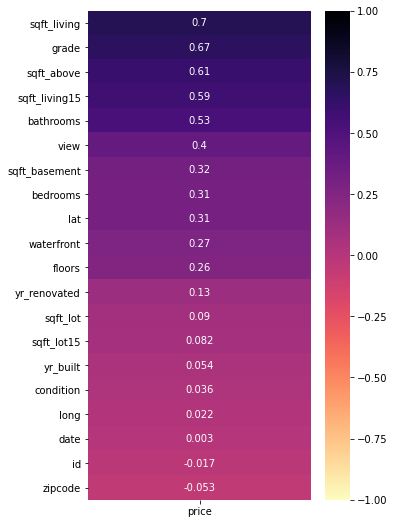

In [ ]:
# 선택한 특징과 price의 상관관계 확인 하기
# 계수가 높다고 좋은 피쳐는 아님

import seaborn as sns

plt.rcParams['figure.figsize'] = (5,9)

heat = df.corr()[['price']].sort_values(by='price', ascending=False)
heat.drop(index='price', inplace=True)

sns.heatmap(heat, vmin = -1, vmax = 1, annot=True, cmap="magma_r");

***Wrapper Methods를 통한 Feature 선택***
- 예측 정확도 측면에서 가장 좋은 성능

- 가장 좋은 "feature의 집단"을 선택

- 시간과 비용이 매우 높게 발생


In [ ]:
# pip install joblib

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

X = df.iloc[:,3:]
y = df.loc[:,'price']

sfs = SFS(LinearRegression(), k_features=10, forward=True, floating=False, scoring = 'r2',cv = 0)
sfs.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


SequentialFeatureSelector(clone_estimator=True, cv=0,
                          estimator=LinearRegression(copy_X=True,
                                                     fit_intercept=True,
                                                     n_jobs=None,
                                                     normalize=False),
                          floating=False, forward=True, k_features=10, n_jobs=1,
                          pre_dispatch='2*n_jobs', scoring='r2', verbose=0)

In [ ]:
df_SFS_results = pd.DataFrame(sfs.subsets_).transpose()
df_SFS_results

,feature_idx,cv_scores,avg_score,feature_names
1,"(2,)",[0.4928532179037931],0.493,"(sqft_living,)"
2,"(2, 14)",[0.5660231511309519],0.566,"(sqft_living, lat)"
3,"(2, 6, 14)",[0.6094953178468947],0.609,"(sqft_living, view, lat)"
4,"(2, 6, 8, 14)",[0.6359584372529241],0.636,"(sqft_living, view, grade, lat)"
5,"(2, 6, 8, 11, 14)",[0.6665619570181933],0.667,"(sqft_living, view, grade, yr_built, lat)"
6,"(2, 5, 6, 8, 11, 14)",[0.6838810820900908],0.684,"(sqft_living, waterfront, view, grade, yr_buil..."
7,"(0, 2, 5, 6, 8, 11, 14)",[0.686972709952441],0.687,"(bedrooms, sqft_living, waterfront, view, grad..."
8,"(0, 1, 2, 5, 6, 8, 11, 14)",[0.6900658872606773],0.690,"(bedrooms, bathrooms, sqft_living, waterfront,..."
9,"(0, 1, 2, 5, 6, 8, 11, 13, 14)",[0.6927133421963738],0.693,"(bedrooms, bathrooms, sqft_living, waterfront,..."
10,"(0, 1, 2, 5, 6, 8, 11, 13, 14, 15)",[0.6960418067352685],0.696,"(bedrooms, bathrooms, sqft_living, waterfront,..."


***Embedded method (Tree-based)를 통한 Feature 선택***
- Filtering과 Wrapper의 장점을 결함한 방법

- 각각의 Feature를 직접 학습하며, 
모델의 정확도에 기여하는 Feature를 선택

- 학습 절차를 최적화

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

X = df.iloc[:,3:]
y = df.loc[:,'price']

# n_estimators : 사용할 트리 수
embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=10), max_features=4)
embeded_rf_selector.fit(X, y)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')
print(embeded_rf_feature)

4 selected features
['sqft_lot', 'lat', 'long', 'sqft_lot15']


***캐글 활용***
[캐글 노트북](https://www.kaggle.com/harlfoxem/housesalesprediction)

price / bedrooms / bathrooms / sqft_living

***다항회귀모델 생성***

- 위의 선택 방법을 종합해 최종 feature 선택
- price, lat, bedrooms, bathrooms, sqft_living

In [ ]:
df1 = df[['price','lat','bedrooms', 'bathrooms', 'sqft_living']]
df1.head()

,price,lat,bedrooms,bathrooms,sqft_living
0,"221,900.000",47.511,3,1.000,1180
1,"538,000.000",47.721,3,2.250,2570
2,"180,000.000",47.738,2,1.000,770
3,"604,000.000",47.521,4,3.000,1960
4,"510,000.000",47.617,3,2.000,1680


In [ ]:
train2 = df1.sample(frac = 0.55, random_state=1)
test2 = df1.drop(train2.index)

print(f'Train data2: {len(train2)}개', f'Test data2: {len(test2)}개', sep="\n" )

Train data2: 11887개
Test data2: 9726개


In [ ]:
f_tures = ['lat','bedrooms', 'bathrooms', 'sqft_living']
target = ['price']

Xtrain = train2[f_tures]
ytrain = train2[target]

Xtest = test2[f_tures]
ytest = test2[target]

model_g = LinearRegression()

model_g.fit(Xtrain,ytrain)

# train - model_g - fit
y_train_pred = model_g.predict(Xtrain)
m_a_e1 = mean_absolute_error(ytrain, y_train_pred)

# test - model_g - fit
y_test_pred = model_g.predict(Xtest)
m_a_e2 = mean_absolute_error(ytest,y_test_pred)

print(f'Train Errors: {m_a_e1:.2f}', f'Test Errors: {m_a_e2:.2f}', sep="\n" )

Train Errors: 150628.52
Test Errors: 149742.95


***회귀계수***

4개 feature 다중회귀 식은 y = b + b1x1 + b2x2 + b3x3 + b4x4 이다.

여기서 b1 = 709512 , b2 = -55700, b3 = 14143, b4 = 302

b2가 음수이므로 y값은 감소한다.

In [ ]:
print(f'{model_g.coef_}',f'{model_g.intercept_}',sep="\n")

[[ 7.09512108e+05 -5.57004238e+04  1.41438590e+04  3.02201159e+02]]
[-33673353.9579382]


In [ ]:
model_g.predict([[10,10,10,10]])

array([[-26990776.51600822]])

In [ ]:
model_g.predict([[40,10,10,10]])

array([[-5705413.28089438]])

***MSE, RMSE, MAE, $R^2$***

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math 

MAE_train2 = mean_absolute_error(ytrain, y_train_pred)
MSE_train2 = mean_squared_error(ytrain, y_train_pred)
RMSE_train2 = math.sqrt(MSE_train2)
R2_train2 = r2_score(ytrain, y_train_pred)

MAE_test2 = mean_absolute_error(ytest, y_test_pred)
MSE_test2 = mean_squared_error(ytest, y_test_pred)
RMSE_test2 = math.sqrt(MSE_test2)
R2_test2 = r2_score(ytest, y_test_pred)

In [ ]:
pd.options.display.float_format = '{:.0f}'.format

pdf3 = pd.DataFrame({'MAE': [MAE_train2, MAE_test2],
              'MSE' : [MSE_train2,MSE_test2],
              'RMSE' : [RMSE_train2,RMSE_test2]},
              index=['Train2','Test2'])
pdf3

,MAE,MSE,RMSE
Train2,150629,59799098635,244539
Test2,149743,53557738723,231425


In [ ]:
pd.options.display.float_format = '{:,.3f}'.format

pdf4 = pd.DataFrame({'R2': [R2_train2,R2_test2]},
              index=['Train2','Test2'])
pdf4

# 두 모델 모두 R_square 값이 0.6정도로 중간보다 약간 높게 위치한다.
# 따라서 좀 더 보완이 필요한 모델임이 틀림없다.

,R2
Train2,0.576
Test2,0.579


***과소적합***
- 학습데이터와 예측값의 오차가 크다 = 편향이 크다.
- 그치만 (학습데이터_예측값) 오차와, (테스트데이터_예측값) 오차의 차이는 작다 = 분산이 낮다

Train Errors: 150628.52

Test Errors: 149742.95

# 참고자료
* [Feature Engineering](https://en.wikipedia.org/wiki/Feature_engineering)
* ["A Few Useful Things to Know about Machine Learning"](https://homes.cs.washington.edu/~pedrod/papers/cacm12.pdf)
* [Machine Learning and AI via Brain simulations](https://forum.stanford.edu/events/2011/2011slides/plenary/2011plenaryNg.pdf)
* [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf),  Chapter 3.1, Simple Linear Regression, & Chapter 3.2, Multiple Linear Regression
* [Brandon Foltz, Statistics 101: Simple Linear Regression](https://www.youtube.com/watch?v=ZkjP5RJLQF4)